#Other Basis Functions

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
from scipy.signal import sawtooth
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [121]:
def generate_periodic_data(period, amplitude, range, noise_scale, size, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size=size)
  ys = amplitude*sawtooth(sample * 2*numpy.pi/period - 1.47)
  noise = 0.33*noise_scale*rng.choice([-1,1], size=ys.shape) * 0.67*rng.normal(loc=0, scale=noise_scale, size=ys.shape)
  return (sample, ys + noise)

def generate_higher_dim_data(range, noise_scale, size, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size=size)
  ys = numpy.power(sample[:,0],2) + numpy.power(sample[:, 1], 3) - numpy.linalg.norm(sample, axis=1)
  noise = rng.normal(loc=0, scale=noise_scale, size=ys.shape)
  return (sample, ys+noise)

def linear_model(A, ys):
  u, s, vT = numpy.linalg.svd(A, full_matrices=False)
  #u = u[:,:A.shape[1]]
  print(s)
  s_inv = numpy.diag(numpy.power(s, -1))
  uT = numpy.transpose(u)
  v = numpy.transpose(vT)
  pinv = numpy.dot(v, numpy.dot(s_inv, uT))
  coefs = numpy.dot(pinv, ys)
  return coefs



# Periodic Data

In [70]:
period = 5
amplitude = 10
eff_range = [-10,10]
xs, ys = generate_periodic_data(period, amplitude, eff_range, 2, (10000, 1), 8675309)

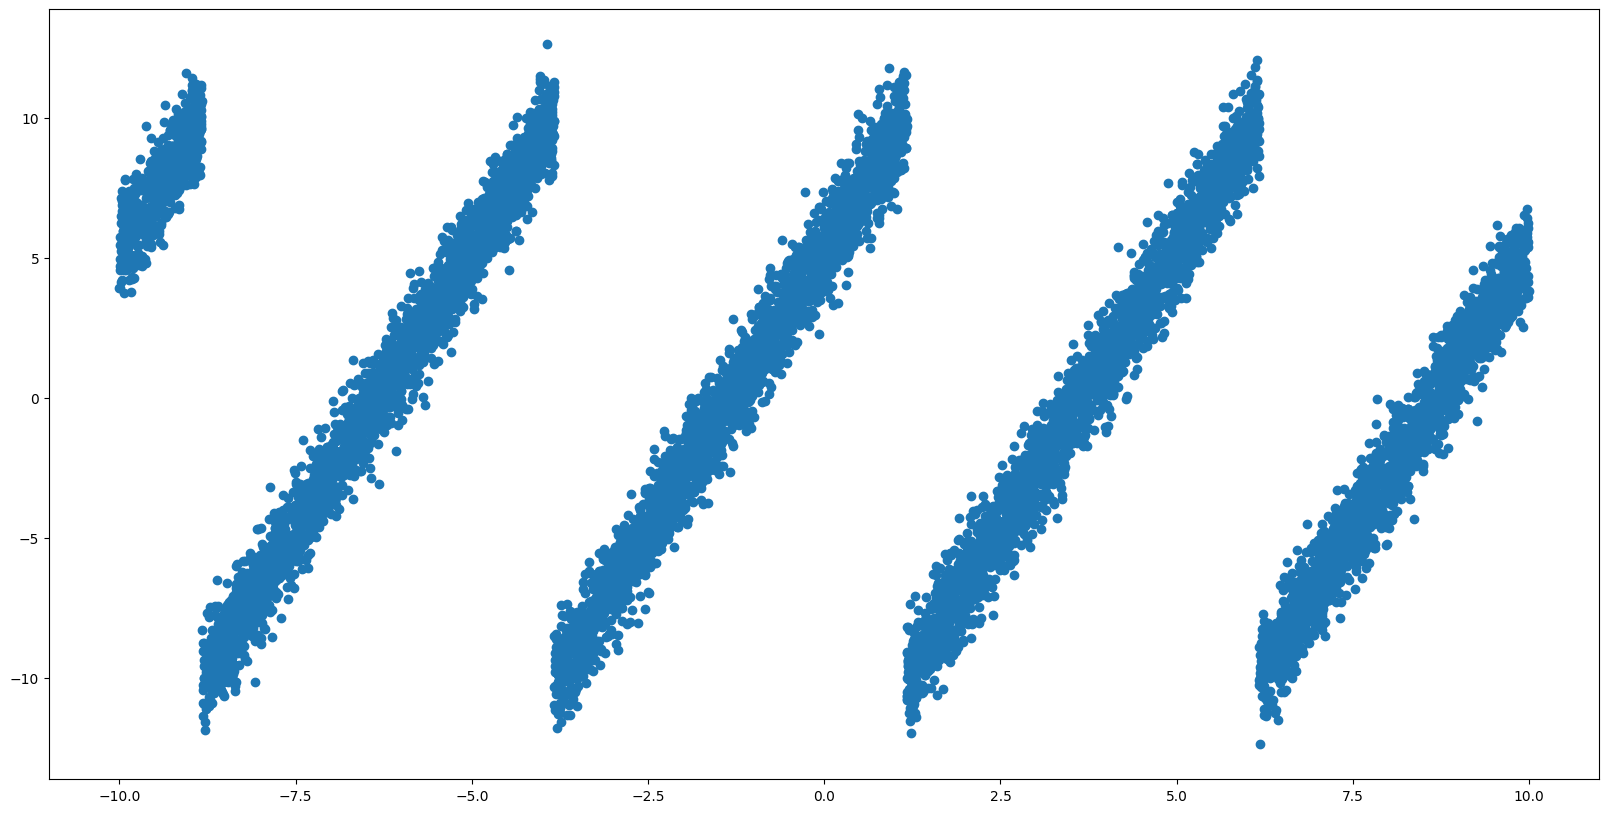

In [71]:
plt.scatter(xs, ys)

In [73]:
parameters = 100
cosines = numpy.hstack([numpy.cos(2*numpy.pi*xs*n/period) for n in range(0,parameters)])
sines = numpy.hstack([numpy.sin(xs*2*numpy.pi*n/period) for n in range(1,parameters)])
A = numpy.hstack([cosines, sines])

In [74]:
coefs = linear_model(A, ys)
preds = numpy.dot(A, coefs)
errors = ys - preds

In [75]:
coefs = numpy.reshape(coefs, (-1,1))

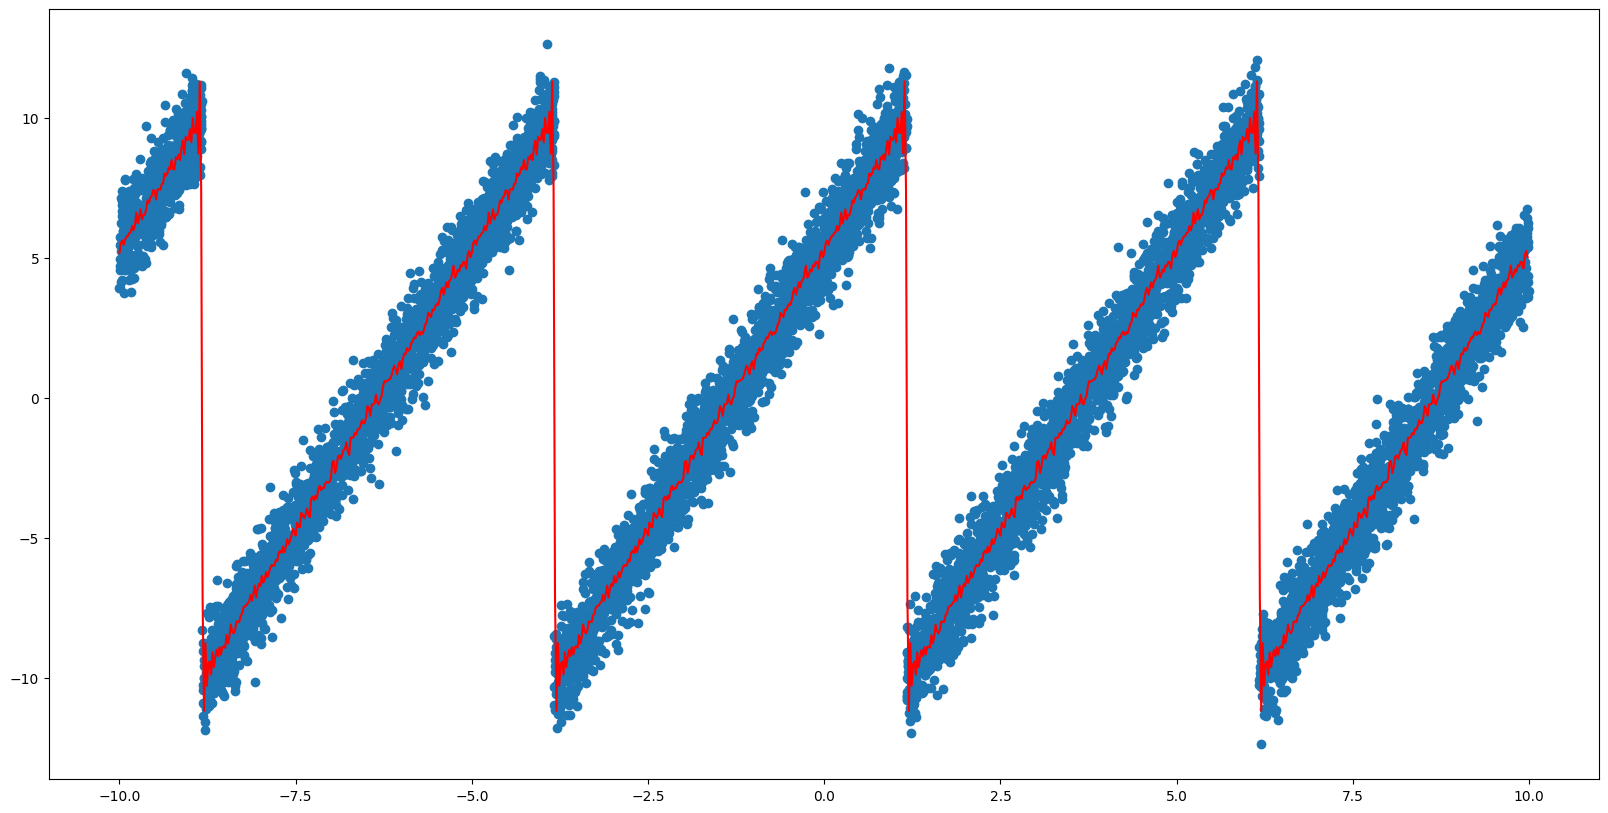

In [76]:
t = numpy.arange(eff_range[0], eff_range[1], (eff_range[1] - eff_range[0])/1000)
cosine_preds = numpy.dot(coefs[:parameters, 0],numpy.array([numpy.cos(n*2*numpy.pi*t/period) for n in range(0,parameters)]))
sine_preds = numpy.dot(coefs[parameters:, 0], numpy.array([numpy.sin(n*2*numpy.pi*t/period) for n in range(1,parameters)]))
prediction = cosine_preds + sine_preds
plt.scatter(xs,ys)
plt.plot(t, prediction, color='red')
plt.show()

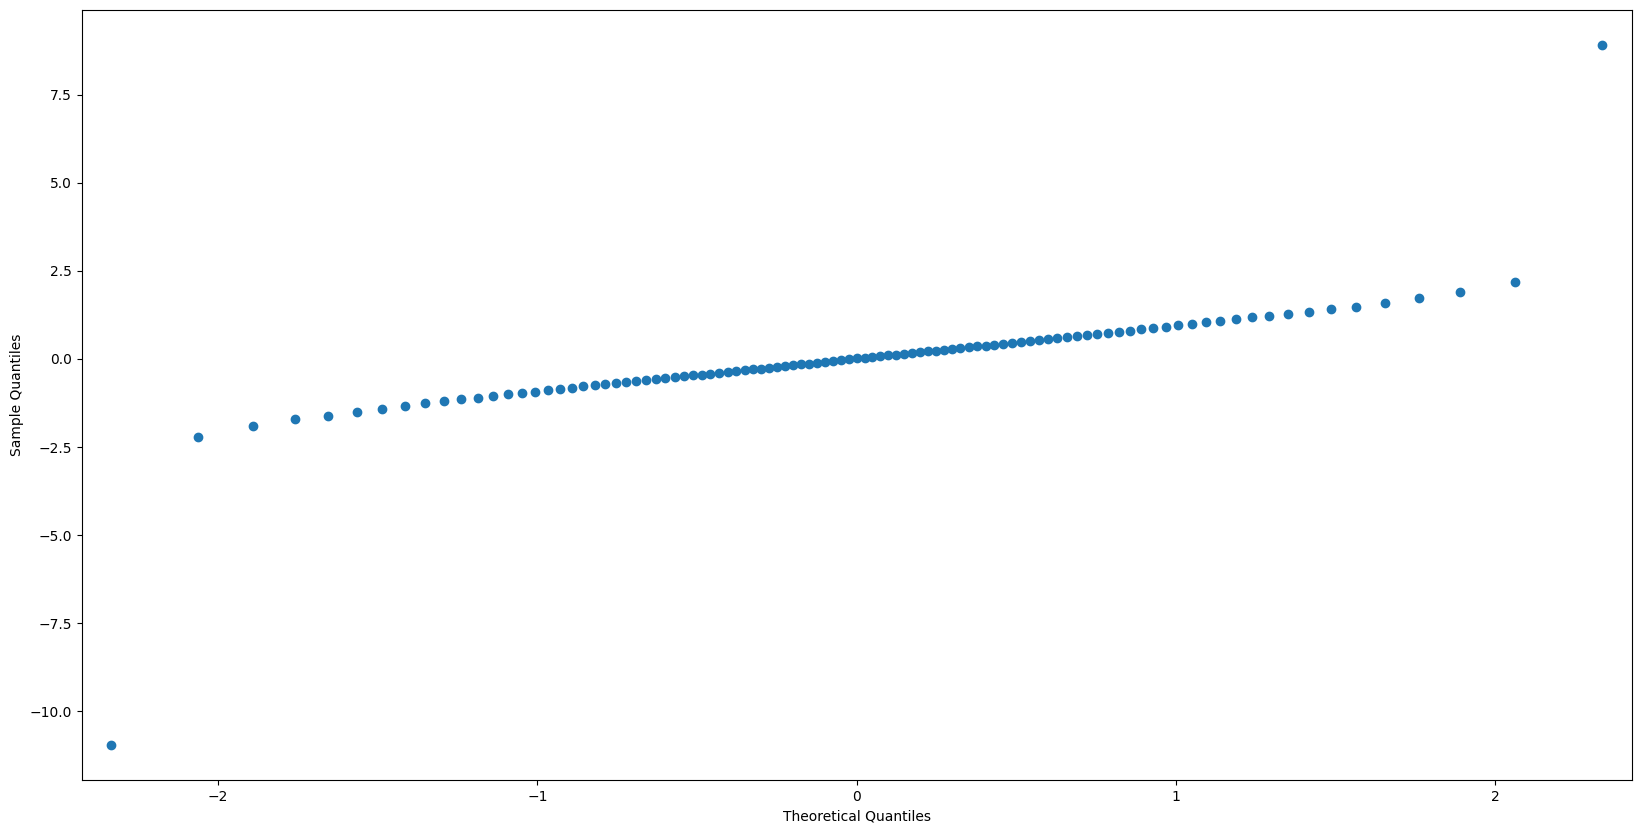

In [77]:
percentiles = numpy.percentile(errors, q=range(0, 101))
sm.qqplot(percentiles)
plt.show()

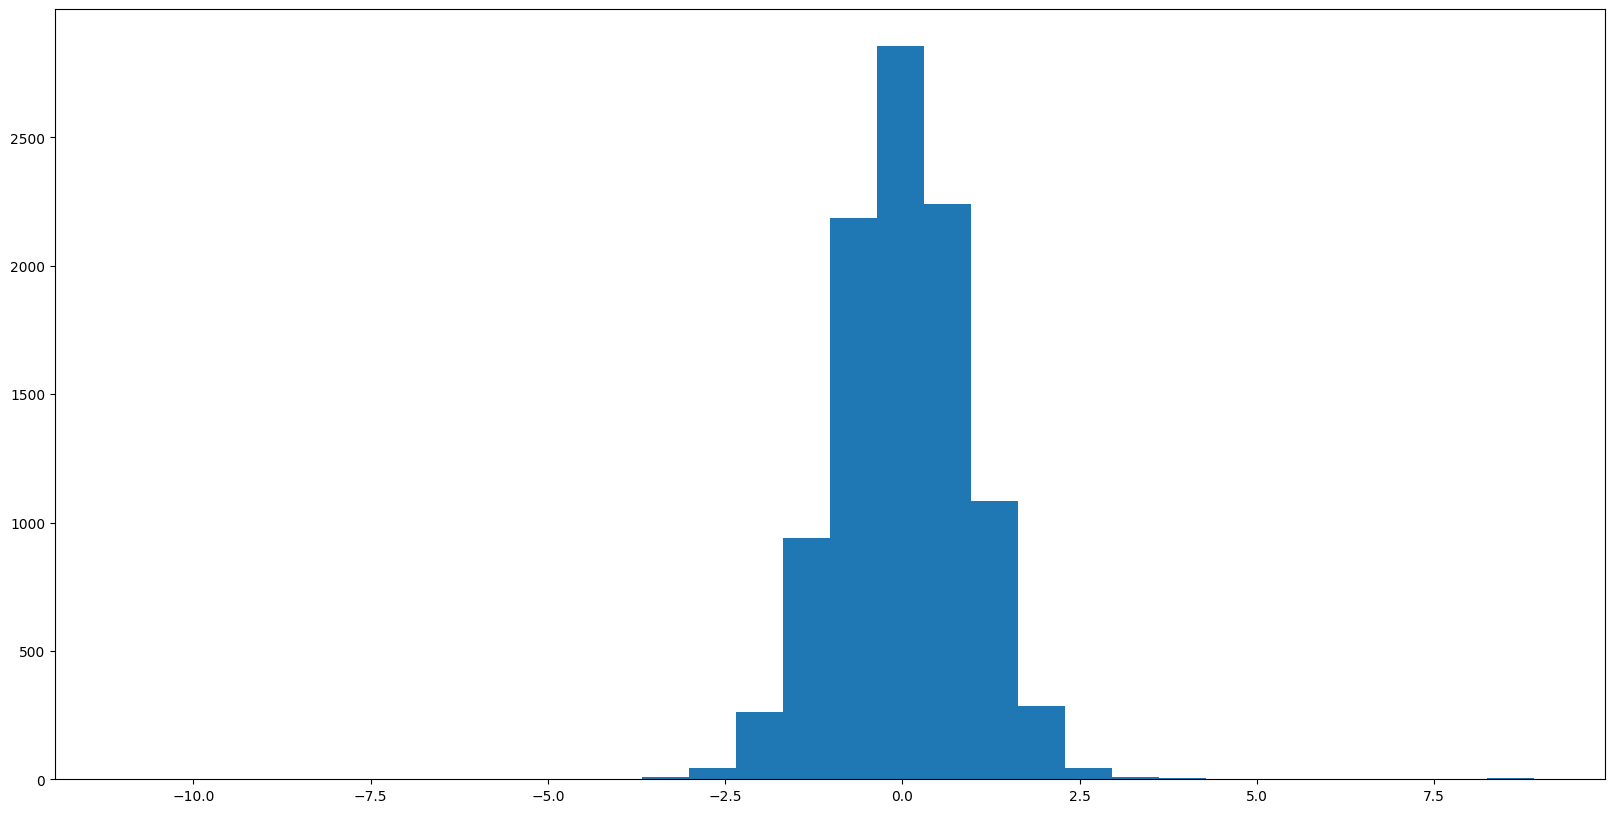

In [78]:
plt.hist(errors, bins=30)
plt.show()

# A Hard Case

In [122]:
eff_range = [-10,10]
seed = 8675309
xs, ys = generate_higher_dim_data(eff_range, 3, [1000, 10], seed=seed)

In [123]:
rng = numpy.random.default_rng(seed=seed)
random_row_nums = rng.choice(xs.shape[0], size=30, replace=False)
random_rows = xs[random_row_nums,:]

In [124]:
random_rows.shape

(30, 10)

In [125]:
xs = xs[:, numpy.newaxis, :]
random_rows = random_rows[numpy.newaxis,:, :]

In [126]:
gamma = rng.uniform(low=0.5, high=2.5, size=(random_rows.shape[1], 1))
A = numpy.exp(-numpy.dot(numpy.power(numpy.linalg.norm(xs - random_rows, axis=2), 2), gamma))
coefs = linear_model(A, ys)
preds = numpy.dot(A, coefs)
errors = preds - ys

[0.]


<ipython-input-121-8a54f7e53693>:19: RuntimeWarning: divide by zero encountered in power
  s_inv = numpy.diag(numpy.power(s, -1))


In [130]:
gamma.shape

(30, 1)

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

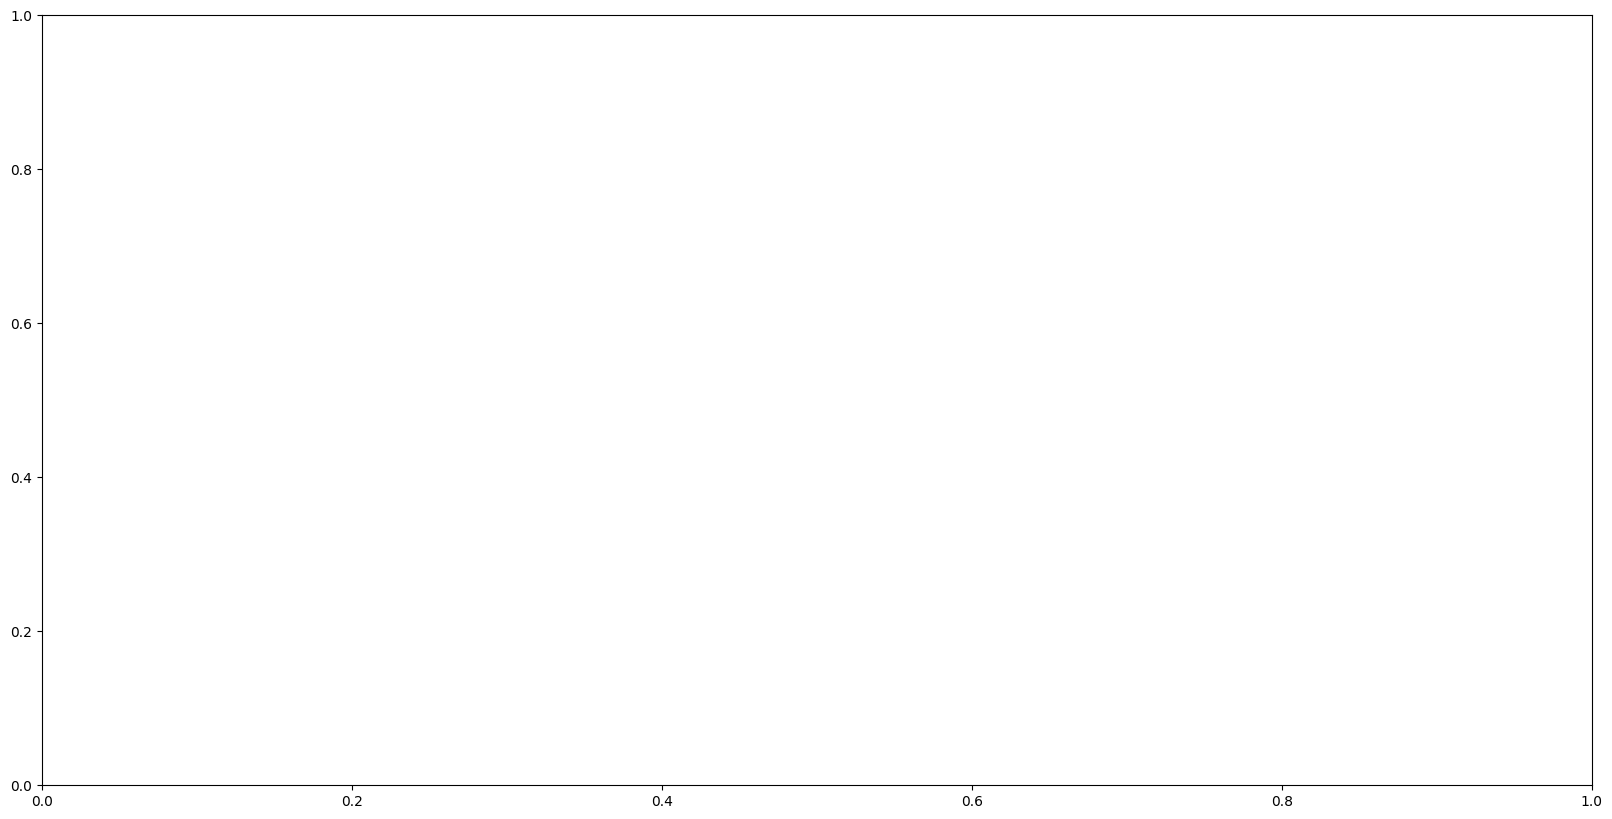

In [109]:
plt.hist(errors, bins=30)